<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versión reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una reseña en inglés sobre una gran cantidad de vinos del mundo.

### __Descripción de los campos__

 - **country**: El país de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensación, etc. del vino.
 - **designation**: La denominación. El viñedo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el área de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones más específicas, especificadas dentro de un área de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que probó y revisó el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que probó y revisó el vino.
 - **title**: el título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [ ]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0   116M      0 --:--:-- --:--:-- --:--:--  116M


In [ ]:
# leemos el dataframe usando read_csv
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [ ]:
#Tiremos la columna Unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### __Veamos cuantas reseñas de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las reseñas de vinos mexicanos. 
- Quédate **sólo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el índice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [ ]:
"""
SECUENCIA:
1. Ubicar todos los registros de México usando indexación booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el índice usando reset_index()
4. Tirar (drop) la nueva columna index 
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# TU CODIGO
# 1. Ubicar todos los registros de México usando indexación booleana
vinosMX = df[df['country']=='Mexico']

# 2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
vinosMX = vinosMX[['country','winery','variety','description','points','price']]

# 3. Reiniciar el índice usando reset_index()
vinosMX = vinosMX.reset_index()

# 4. Tirar (drop) la nueva columna index 
vinosMX = vinosMX.drop('index',axis=1)
vinosMX.head(5)

,country,winery,variety,description,points,price
0,Mexico,L.A. Cetto,Nebbiolo,"The color is appropriately light, the aromas a...",88,18.0
1,Mexico,Monte Xanic,Sauvignon Blanc,"Sauvignon Blanc is, in general, one of Baja's ...",87,15.0
2,Mexico,L.A. Cetto,Cabernet Sauvignon,"Aromas of mature Cabernet: cassis, tobacco lea...",87,18.0
3,Mexico,Cava Aragon,Nebbiolo,"While this is fiery on the nose, you also get ...",88,27.0
4,Mexico,L.A. Cetto,Petite Sirah,"Dark and earthy, slightly pruny and alcoholic,...",83,8.0


### __Veamos cuantas reseñas de vinos por país tenemos.__

#### &#9758; Muestra en una gráfica de barras la distribución del número de reseñas por país (_top 10_). 

#### Puedes auxiliarte con alguna de estos métodos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


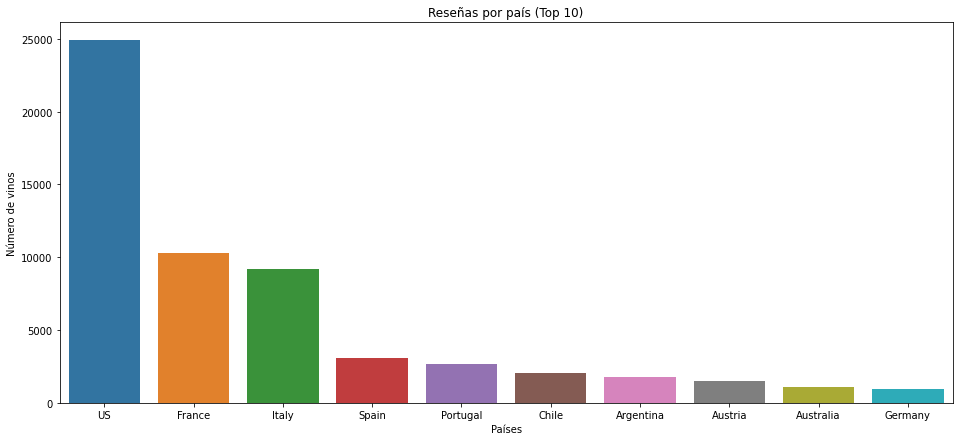

In [ ]:
"""
SECUENCIA:
1. Ubicar el nombre de la columna de país
2. Sobre esta columna, obtener la Serie correspondiente
3. Hacer un conteo de los valores únicos sobre esta Serie

4. X en la gráfica de barras son los países (índice de la Serie)
5. Y en la gráfica de barras son los conteos por país (values de la Serie)
6. Usar Seaborn para graficar el diagrama de barras
7. Rotular la gráfica y los ejes
"""
# 1. Ubicar el nombre de la columna de país
# 2. Sobre esta columna, obtener la Serie correspondiente
# 3. Hacer un conteo de los valores únicos sobre esta Serie
conteos=df.country.value_counts()

# 4. X en la gráfica de barras son los países (índice de la Serie)
# 5. Y en la gráfica de barras son los conteos por país (values de la Serie)
x = conteos.index
y = conteos.values

plt.figure(figsize=(16,7))
sns.barplot(x[:10], y[:10])

# En una sola línea:
#sns.barplot(df.country.value_counts().index[:10], df.country.value_counts().values[:10])

plt.xlabel("Países")
plt.ylabel("Número de vinos")
plt.title("Reseñas por país (Top 10)")

plt.show()

### __Veamos ahora cuál es el precio promedio por cada país.__

#### &#9758; Muestra en una gráfica de barras el precio promedio por país, en orden descendente (_top 10_). 

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¿Cuál sería el precio promedio por variedad? 

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

In [ ]:
promedios =df.groupby('country').price.mean().sort_values(ascending=False)
promedios.head(10)

country
Switzerland    97.000000
Hungary        52.839286
England        51.275862
France         41.520469
Germany        41.057325
Italy          39.633606
US             36.593320
Australia      36.512381
Canada         35.712871
Israel         31.500000
Name: price, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


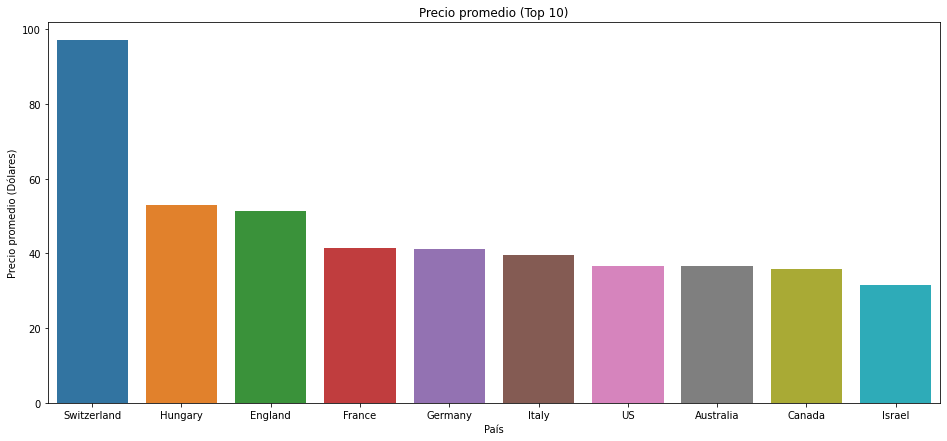

In [ ]:
"""
SECUENCIA:
1. Ubicar el nombre de la columna de país y precio.
2. Sobre la columna de precio obtener el promedio
3. Ordenar los valores obtenidos del promedio.

4. X en la gráfica de barras son los países (índice)
5. Y en la gráfica de barras son los promedio del precio por país (values)
6. Usar Seaborn para graficar el diagrama de barras
7. Rotular la gráfica y los ejes

"""
###############################
promedios =df.groupby('country').price.mean().sort_values(ascending=False)
x=promedios.index
y=promedios.values
#######################################
plt.figure(figsize=(16,7))

sns.barplot(x[:10], y[:10])

plt.xlabel("País")
plt.ylabel("Precio promedio (Dólares)")
plt.title("Precio promedio (Top 10)")

plt.show()

#### Agregando anotaciones a nuestros gráficos

Es posible agregar información a nuestros gráficos, en forma de texto, o dibujos (e.g. flechas, líneas, círculos, etc.). Para ello, se utiliza la anotación (annotate) de ejes (axes). Detallar aquí cómo funciona nos llevaría mucho tiempo. Puedes consultar la documentación en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


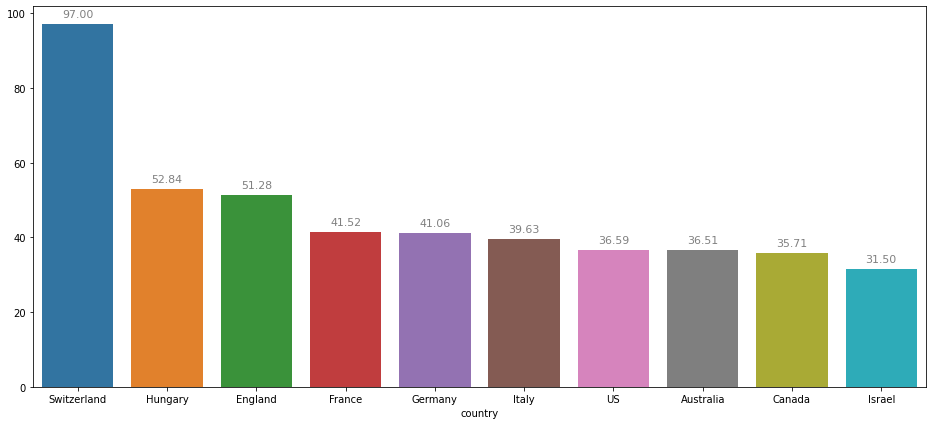

In [ ]:
#Definimos el tamaño del canvas
plt.figure(figsize=(16,7))

# la variable "ax" (axes) contiene la información  del gráfico de barras.
# En particular, contiene todo lo relativo a los parches (rectángulos) del barplot.
ax = sns.barplot(x[:10], y[:10])

# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=11, color='gray',\
                xytext=(0, 10),\
                textcoords='offset points')
    
plt.show()

### __Ahora queremos darnos una idea de cuáles podrían ser los países cuyos vinos tienen una mejor razón calidad-precio en promedio.__

#### &#9758; Muestra en una gráfica de barras la razón puntos/precio promedio por país, en orden descendente (_top 10_). Muestra los valores de la razón sobre cada barra. 

✋ __Recuerda que si divides entre 0 o Nan obtendrás inf o nan__
 
🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

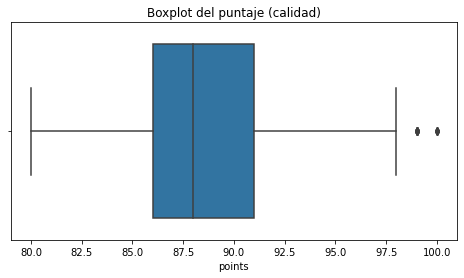

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df.points)
plt.title("Boxplot del puntaje (calidad)")
plt.show()

In [ ]:
df['puntos/precio']=df['points']/df['price']
calidad=df.groupby('country')['puntos/precio'].agg('mean').sort_values(ascending=False)
calidad.head(10)

country
Ukraine                   9.400000
Romania                   8.549444
Bulgaria                  7.375277
India                     7.162500
Bosnia and Herzegovina    6.538462
Moldova                   6.325976
Armenia                   6.214286
Peru                      5.714683
Chile                     5.669034
Macedonia                 5.630556
Name: puntos/precio, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x360 with 0 Axes>

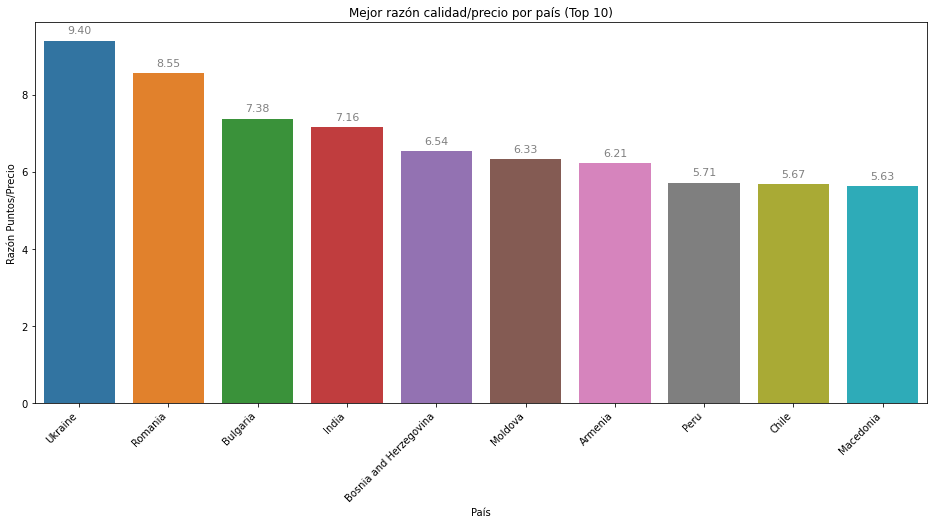

In [ ]:
"""
SECUENCIA:
1. Agregar al dataframe la columna puntos/precio.
2. Sobre la columna de puntos/precio obtener el promedio.
3. Ordenar los valores obtenidos.

4. X en la gráfica de barras son los países (índice)
5. Y en la gráfica de barras son los valores de puntos/precio (values)
6. Usar Seaborn para graficar el diagrama de barras
7. Rotular la gráfica y los ejes

"""
plt.figure(figsize=(10,5))

### TU CODIGO AQUI ##########
df['puntos/precio']=df['points']/df['price']
calidad=df.groupby('country')['puntos/precio'].agg('mean').sort_values(ascending=False)
x=calidad.index
y=calidad.values

#Definimos el tamaño del canvas
plt.figure(figsize=(16,7))

# la variable "ax" (axes) contiene la información  del gráfico de barras.
# En particular, contiene todo lo relativo a los parches (rectángulos) del barplot.
ax = sns.barplot(x[:10], y[:10])

############################

plt.title("Mejor razón calidad/precio por país (Top 10)")
plt.xlabel("País")
plt.xticks(rotation= 45, ha="right")
plt.ylabel("Razón Puntos/Precio")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
plt.show()

### __¿Qué vinos tienen la mejor puntuación y a qué países pertenecen?__

#### &#9758; Muestra en una gráfica de pastel la proporción de los países que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

<AxesSubplot:ylabel='points'>

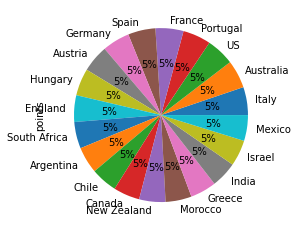

In [ ]:
#TU CODIGO
vinos=df.groupby('country')['points'].agg('max').sort_values(ascending=False)
v=vinos[:20]
v.plot.pie(autopct='%1.0f%%')

### __¿Cuáles son las 10 variedades de uva más abundantes y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [ ]:
#TU CODIGO
variedades =df['variety'].value_counts()/len(df['variety'].value_counts())
variedades[:10]


Pinot Noir                  10.510345
Chardonnay                   9.212069
Cabernet Sauvignon           7.505172
Red Blend                    7.205172
Bordeaux-style Red Blend     5.455172
Riesling                     4.148276
Sauvignon Blanc              4.041379
Syrah                        3.275862
Rosé                         2.741379
Merlot                       2.434483
Name: variety, dtype: float64

### __¿Cuáles son las 20 bodegas más mencionadas y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [ ]:
#TU CODIGO
bodegas =df['winery'].value_counts()/len(df['winery'].value_counts())
bodegas[:20]



Georges Duboeuf               0.008309
Wines & Winemakers            0.008156
Testarossa                    0.007394
Louis Latour                  0.006632
Chateau Ste. Michelle         0.006555
Williams Selyem               0.006555
DFJ Vinhos                    0.006555
Concha y Toro                 0.005946
Gary Farrell                  0.005641
Lynmar                        0.005488
Kendall-Jackson               0.005183
Robert Mondavi                0.004955
Columbia Crest                0.004345
Trapiche                      0.004345
Undurraga                     0.004269
Siduri                        0.004192
Albert Bichot                 0.004192
Jean-Luc and Paul Aegerter    0.004040
Casa Santos Lima              0.004040
Rodney Strong                 0.004040
Name: winery, dtype: float64

### __Vamos ahora a construir una nueva tabla de información__

#### &#9758; Construye una tabla que muestre país, variedad de uva, bodega, y valores de puntuación y precio.
- Considera las 10 variedades de uva y las 20 bodegas más importantes.
- Haz una tabla con estos datos y sólo los valores de país, bodega, variedad, puntuación y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que éste incluya su país de origen.
- Ordena los datos por nombre de país, variedad y bodega (orden ascendente).

In [ ]:
#TU CODIGO
#b={Pinot Noir,Chardonnay,Cabernet Sauvignon,Red Blend,Bordeaux-style Red Blend,Riesling,Sauvignon Blanc,Syrah,Rosé,Merlot}
# 1. Extraer solamente las columnas solicitadas.
p_v = df[['country','winery','variety','points','price','puntos/precio']]
p_v.head(5)


,country,winery,variety,points,price,puntos/precio
0,Italy,Nicosia,White Blend,87,NaN,NaN
1,Portugal,Quinta dos Avidagos,Portuguese Red,87,15.0,5.800000
2,US,Rainstorm,Pinot Gris,87,14.0,6.214286
3,US,St. Julian,Riesling,87,13.0,6.692308
4,US,Sweet Cheeks,Pinot Noir,87,65.0,1.338462


In [ ]:
import functools
def filtro (p_v,vb):
  cond=[df[k].apply(lambda k:k in v if v !=[''] else True) for k,v in vb.items()]
  cond_total=functools.reduce(lambda x,y:x & y, cond)
  p_v = p_v[cond_total]
  return p_v



vb={'variety':['Pinot Noir','Chardonnay','Cabernet Sauvignon','Red Blend','Bordeaux-style Red Blend','Riesling','Sauvignon Blanc','Syrah','Rosé','Merlot'],
    'winery':['Georges Duboeuf','Wines & Winemakers','Testarossa','Louis Latour','Chateau Ste. Michelle','Williams Selyem',
              'DFJ Vinhos','Concha y Toro','Gary Farrell','Lynmar','Kendall-Jackson','Robert Mondavi','Columbia Crest','Trapiche',
              'Undurraga','Siduri','Albert Bichot','Jean-Luc and Paul Aegerter','Casa Santos Lima','Rodney Strong']}

p=filtro(p_v, vb)
p.head(5)

,country,winery,variety,points,price,puntos/precio
145,US,Testarossa,Pinot Noir,91,64.0,1.421875
235,US,Testarossa,Syrah,85,49.0,1.734694
314,US,Robert Mondavi,Cabernet Sauvignon,87,28.0,3.107143
353,France,Louis Latour,Chardonnay,96,630.0,0.152381
363,France,Louis Latour,Chardonnay,95,380.0,0.250000


In [ ]:
p["winery"] =p["winery"] + "-" + p["country"] 


<ipython-input-18-03ca7c6dab0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p["winery"] =p["winery"] + "-" + p["country"]


In [ ]:
p_v=p.copy()
p_v

,country,winery,variety,points,price,puntos/precio
145,US,Testarossa-US,Pinot Noir,91,64.0,1.421875
235,US,Testarossa-US,Syrah,85,49.0,1.734694
314,US,Robert Mondavi-US,Cabernet Sauvignon,87,28.0,3.107143
353,France,Louis Latour-France,Chardonnay,96,630.0,0.152381
363,France,Louis Latour-France,Chardonnay,95,380.0,0.250000
...,...,...,...,...,...,...
59674,US,Siduri-US,Pinot Noir,92,49.0,1.877551
59682,US,Lynmar-US,Pinot Noir,92,80.0,1.150000
59750,US,Gary Farrell-US,Pinot Noir,87,50.0,1.740000
59789,France,Albert Bichot-France,Pinot Noir,86,NaN,NaN


In [ ]:
p_v.dropna(axis=0, how='any')


,country,winery,variety,points,price,puntos/precio
145,US,Testarossa-US,Pinot Noir,91,64.0,1.421875
235,US,Testarossa-US,Syrah,85,49.0,1.734694
314,US,Robert Mondavi-US,Cabernet Sauvignon,87,28.0,3.107143
353,France,Louis Latour-France,Chardonnay,96,630.0,0.152381
363,France,Louis Latour-France,Chardonnay,95,380.0,0.250000
...,...,...,...,...,...,...
59639,France,Jean-Luc and Paul Aegerter-France,Pinot Noir,88,148.0,0.594595
59674,US,Siduri-US,Pinot Noir,92,49.0,1.877551
59682,US,Lynmar-US,Pinot Noir,92,80.0,1.150000
59750,US,Gary Farrell-US,Pinot Noir,87,50.0,1.740000


In [ ]:
p_v = p_v.sort_values(by = ['country','variety','winery'],ascending=True)
p_v

,country,winery,variety,points,price,puntos/precio
2141,Argentina,Trapiche-Argentina,Cabernet Sauvignon,84,10.0,8.400000
3056,Argentina,Trapiche-Argentina,Cabernet Sauvignon,88,15.0,5.866667
15948,Argentina,Trapiche-Argentina,Cabernet Sauvignon,90,15.0,6.000000
24370,Argentina,Trapiche-Argentina,Cabernet Sauvignon,88,10.0,8.800000
30928,Argentina,Trapiche-Argentina,Cabernet Sauvignon,91,30.0,3.033333
...,...,...,...,...,...,...
235,US,Testarossa-US,Syrah,85,49.0,1.734694
21415,US,Testarossa-US,Syrah,91,54.0,1.685185
37366,US,Testarossa-US,Syrah,94,54.0,1.740741
54756,US,Testarossa-US,Syrah,94,54.0,1.740741


In [ ]:
p_v=p_v.dropna()

#### &#9758; Observa la relación puntos-precio por país

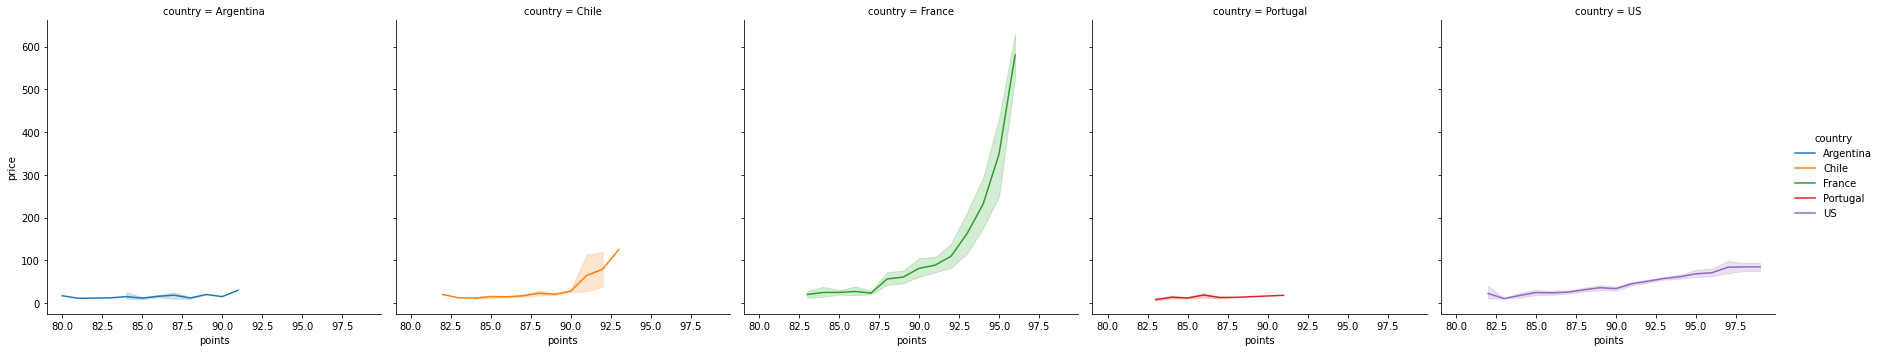

In [ ]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=p_v)

#### &#9758; Observa las distribuciones por pares en función de la variedad de uva.

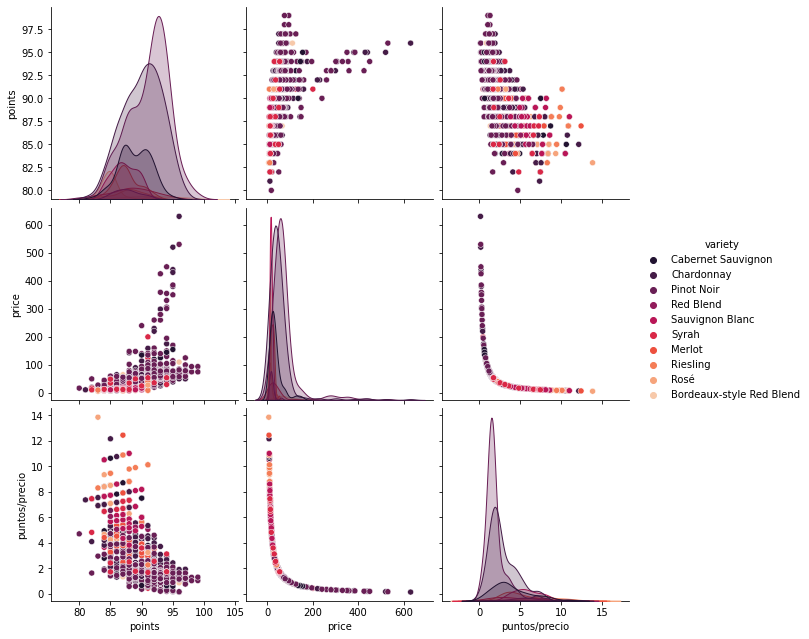

In [ ]:
sns.pairplot(p_v, hue="variety",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función del país.

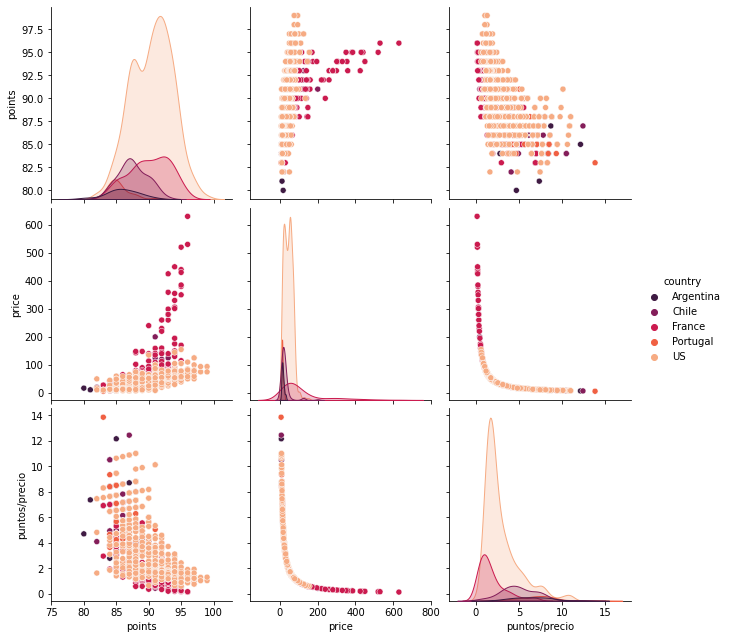

In [ ]:
#TU CODIGO
sns.pairplot(p_v, hue="country",height=3,palette='rocket')


#### &#9758; Observa las distribuciones por pares en función de la bodega.

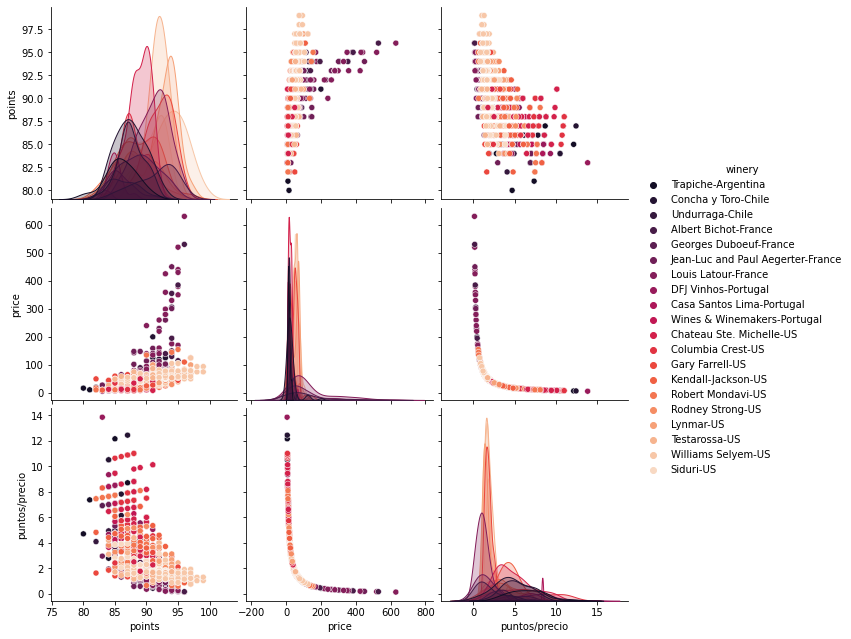

In [ ]:
#TU CODIGO
sns.pairplot(p_v, hue="winery",height=3,palette='rocket')


#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

<AxesSubplot:xlabel='variety', ylabel='price'>

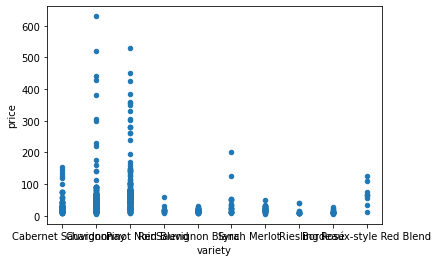

In [ ]:
#TU CODIGO
p_v.plot.scatter(x='variety', y='price')

#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

<AxesSubplot:xlabel='winery', ylabel='price'>

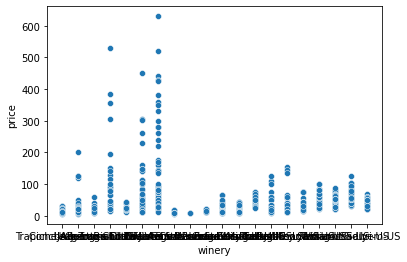

In [ ]:
#TU CODIGO
sns.scatterplot(x = "winery", y = "price", data = p_v)


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

<AxesSubplot:xlabel='winery', ylabel='puntos/precio'>

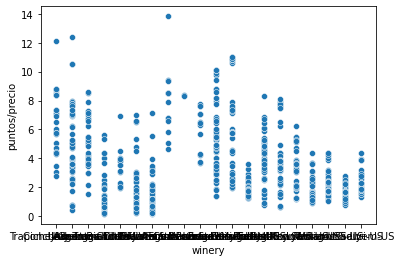

In [ ]:
#TU CODIGO
sns.scatterplot(x = "winery", y = "puntos/precio", data = p_v)

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por país.

<AxesSubplot:xlabel='country', ylabel='puntos/precio'>

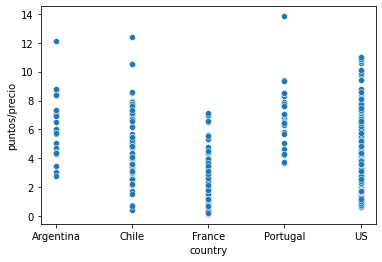

In [ ]:
#TU CODIGO
sns.scatterplot(x = "country", y = "puntos/precio", data = p_v)

### __Agrega los datos de México a esta última tabla de información__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Asegúrate de __no agregar__ la columna de descripción 

In [ ]:
#TU CODIGO
vinosMX=vinosMX.drop(['description'], axis=1)

In [ ]:
vinosMX['puntos/precio']=vinosMX['points']/vinosMX['price']
vinosMX

,country,winery,variety,points,price,puntos/precio
0,Mexico,L.A. Cetto,Nebbiolo,88,18.0,4.888889
1,Mexico,Monte Xanic,Sauvignon Blanc,87,15.0,5.800000
2,Mexico,L.A. Cetto,Cabernet Sauvignon,87,18.0,4.833333
3,Mexico,Cava Aragon,Nebbiolo,88,27.0,3.259259
4,Mexico,L.A. Cetto,Petite Sirah,83,8.0,10.375000
5,Mexico,Hacienda La Lomita,Rosé,83,21.0,3.952381
6,Mexico,Monte Xanic,Cabernet Franc,86,39.0,2.205128
7,Mexico,Tres Valles,Sauvignon Blanc,84,15.0,5.600000
8,Mexico,Unión de Productores del Valle (UPVG),Red Blend,83,22.0,3.772727
9,Mexico,Monte Xanic,Red Blend,90,56.0,1.607143


In [ ]:
p_v

,country,winery,variety,points,price,puntos/precio
2141,Argentina,Trapiche-Argentina,Cabernet Sauvignon,84,10.0,8.400000
3056,Argentina,Trapiche-Argentina,Cabernet Sauvignon,88,15.0,5.866667
15948,Argentina,Trapiche-Argentina,Cabernet Sauvignon,90,15.0,6.000000
24370,Argentina,Trapiche-Argentina,Cabernet Sauvignon,88,10.0,8.800000
30928,Argentina,Trapiche-Argentina,Cabernet Sauvignon,91,30.0,3.033333
...,...,...,...,...,...,...
32257,US,Rodney Strong-US,Syrah,94,30.0,3.133333
235,US,Testarossa-US,Syrah,85,49.0,1.734694
21415,US,Testarossa-US,Syrah,91,54.0,1.685185
37366,US,Testarossa-US,Syrah,94,54.0,1.740741


In [ ]:
df3 =pd.concat([p_v,vinosMX])
df3.index = range(df3.shape[0])
df3

,country,winery,variety,points,price,puntos/precio
0,Argentina,Trapiche-Argentina,Cabernet Sauvignon,84,10.0,8.400000
1,Argentina,Trapiche-Argentina,Cabernet Sauvignon,88,15.0,5.866667
2,Argentina,Trapiche-Argentina,Cabernet Sauvignon,90,15.0,6.000000
3,Argentina,Trapiche-Argentina,Cabernet Sauvignon,88,10.0,8.800000
4,Argentina,Trapiche-Argentina,Cabernet Sauvignon,91,30.0,3.033333
...,...,...,...,...,...,...
974,Mexico,Viñas de Garza,Red Blend,92,54.0,1.703704
975,Mexico,L.A. Cetto,Chardonnay,84,10.0,8.400000
976,Mexico,Hacienda La Lomita,Sauvignon Blanc-Chenin Blanc,86,22.0,3.909091
977,Mexico,La Lomita,Bordeaux-style Red Blend,88,40.0,2.200000


#### &#9758; Calcula los valores de points/price para los vinos de México
- TIP: Usa el método apply sobre `df3[['points','price','points/price']]`

In [ ]:
# TU CODIGO
#########

#### &#9758; Observa la relación puntos-precio por país

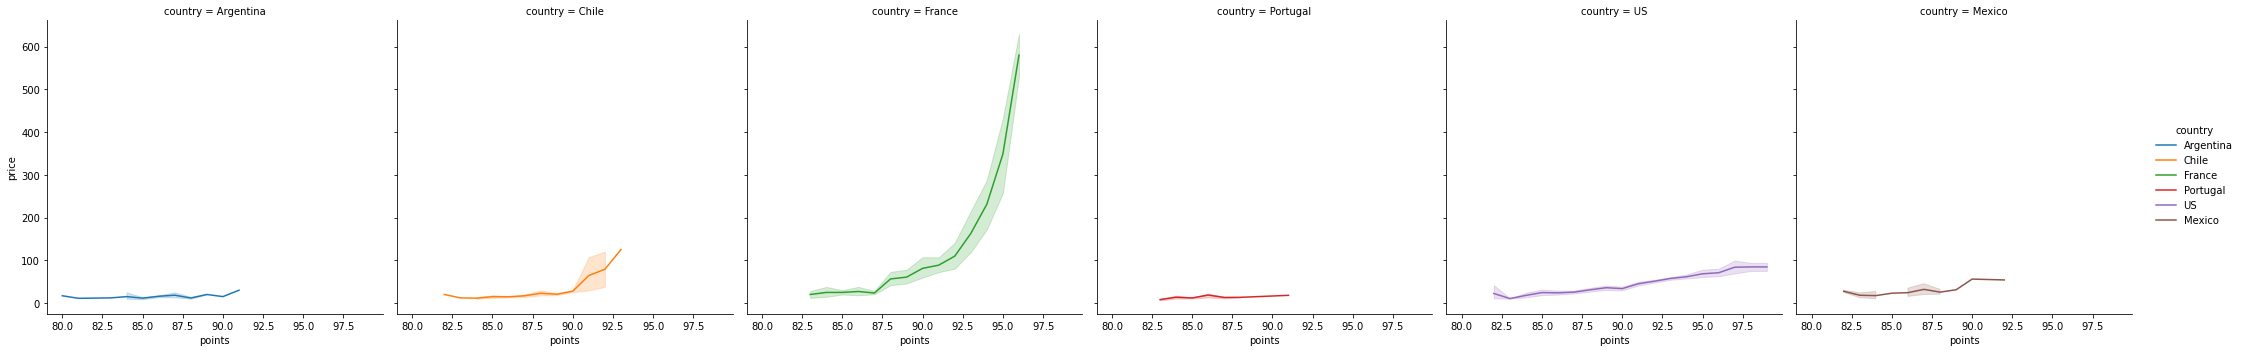

In [ ]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=df3)

#### &#9758; Observa las distribuciones por pares en función del país.
- Construye una tabla auxiliar "mx_top", donde los datos de México (en df3) aparezcan al final de la tabla mx_top.

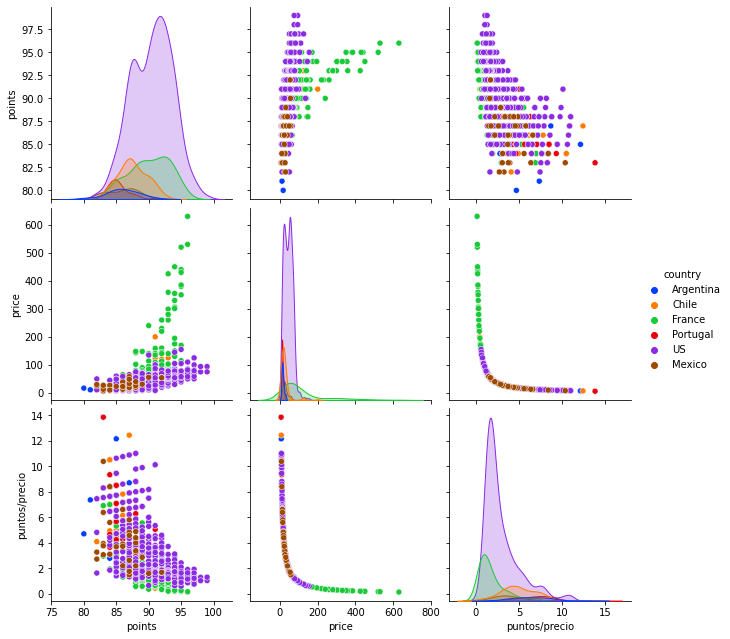

In [ ]:
mx_top = df3
sns.pairplot(mx_top, hue="country",height=3,palette='bright')

#### &#9758; Observa las distribuciones (scatter) de puntos por país.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Argentina'),
  Text(1, 0, 'Chile'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Portugal'),
  Text(4, 0, 'US'),
  Text(5, 0, 'Mexico')])

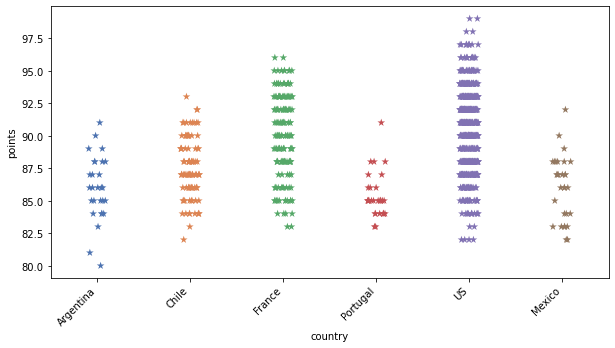

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'Trapiche-Argentina'),
  Text(1, 0, 'Concha y Toro-Chile'),
  Text(2, 0, 'Undurraga-Chile'),
  Text(3, 0, 'Albert Bichot-France'),
  Text(4, 0, 'Georges Duboeuf-France'),
  Text(5, 0, 'Jean-Luc and Paul Aegerter-France'),
  Text(6, 0, 'Louis Latour-France'),
  Text(7, 0, 'DFJ Vinhos-Portugal'),
  Text(8, 0, 'Casa Santos Lima-Portugal'),
  Text(9, 0, 'Wines & Winemakers-Portugal'),
  Text(10, 0, 'Chateau Ste. Michelle-US'),
  Text(11, 0, 'Columbia Crest-US'),
  Text(12, 0, 'Gary Farrell-US'),
  Text(13, 0, 'Kendall-Jackson-US'),
  Text(14, 0, 'Robert Mondavi-US'),
  Text(15, 0, 'Rodney Strong-US'),
  Text(16, 0, 'Lynmar-US'),
  Text(17, 0, 'Testarossa-US'),
  Text(18, 0, 'Williams Selyem-US'),
  Text(19, 0, 'Siduri-US'),
  Text(20, 0, 'L.A. Cetto'),
  Text(21, 0, 'Monte Xanic'),
  Text(22, 0, 'Cava Aragon')

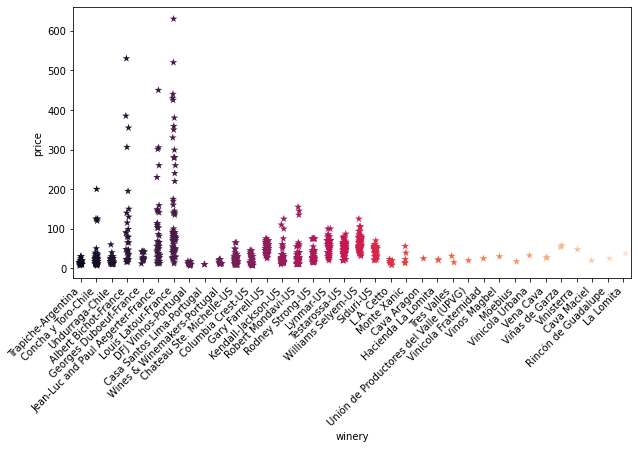

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una línea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre país y bodega para calcular primero los valores promedio)

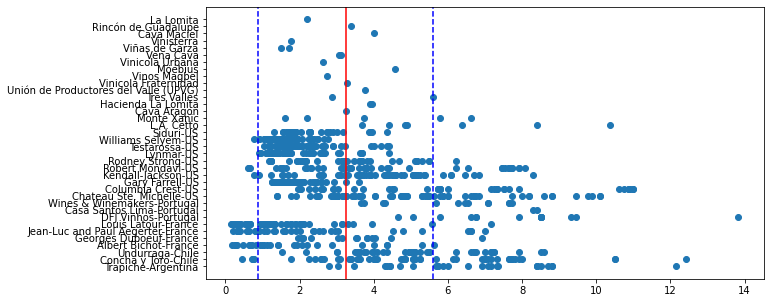

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.scatter(x=df3['puntos/precio'],y=df3['winery'])
ax.axvline(x=np.mean(df3['puntos/precio']),c='r')
ax.axvline(x=np.mean(df3['puntos/precio'])-np.std(df3['puntos/precio']),c='b',ls='--')
ax.axvline(x=np.mean(df3['puntos/precio'])+np.std(df3['puntos/precio']),c='b',ls='--')

plt.show()

#### &#9758; Si consideramos la proporción de los países con mejor relación puntos/precio, ¿cómo queda México?
- Usa un gráfico de pastel

<AxesSubplot:ylabel='puntos/precio'>

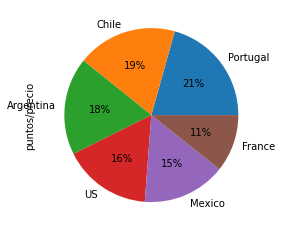

In [ ]:
# TU CODIGO
proporcion=df3.groupby('country')['puntos/precio'].agg('max').sort_values(ascending=False)

proporcion.plot.pie(autopct='%1.0f%%')
